<a href="https://colab.research.google.com/github/iwatake2222/study_karaage_ai/blob/master/karaage_ai_03_00_word2vec.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!wget https://github.com/aozorabunko/aozorabunko/raw/master/cards/000096/files/2093_ruby_28087.zip
!unzip 2093_ruby_28087.zip

In [ ]:
!apt install -y nkf

In [ ]:
!nkf --guess dogura_magura.txt

Shift_JIS (CRLF)


In [ ]:
text_list = []
with open("dogura_magura.txt", encoding="shift_jis") as f:
  text_list = f.readlines()

In [ ]:
text_list[0:10]

In [ ]:
!pip install janome

     |████████████████████████████████| 19.7MB 1.3MB/s 


In [ ]:
from janome.tokenizer import Tokenizer

t = Tokenizer()
tokens = t.tokenize("私はからあげが好きです。")

words = []
for token in tokens:
  print(token)
  words.append(token.surface)
text =" ".join(words)
print(text)

'記号,句点,*,*'

In [ ]:
from janome.tokenizer import Tokenizer

t = Tokenizer()
words = []
for text in text_list:
  tokens = t.tokenize(text)
  for token in tokens:
    pos = token.part_of_speech.split(",")[0]
    if pos == "名詞":
      words.append(token.surface)
text =" ".join(words)
print(text[500:600])

ペンキ 塗 天井 裏 薄 塵埃 ほこり 蔽 裸 電球 タッタ 一つ ブラ 赤 硝子 球 ガラス だま 横腹 蠅 はえ 一 匹 凝然 真下 人造 石 床 上 私 大の字 型 なり 私 大の字 型 なり 


In [ ]:
!apt install -y fonts-ipafont-gothic
!pip install wordcloud

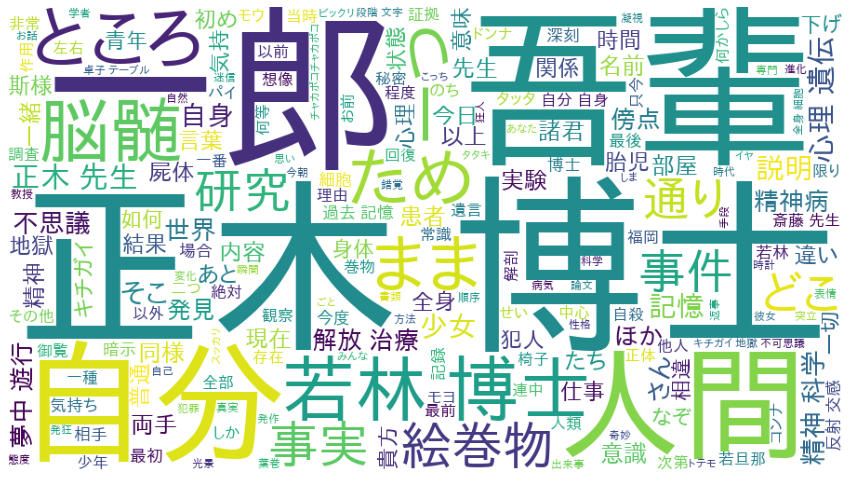

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

fpath = "/usr/share/fonts/opentype/ipafont-gothic/ipagp.ttf"
wordcloud = WordCloud(background_color="white", font_path=fpath, width=900, height=500).generate(text)
plt.figure(figsize=(15,12))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

In [ ]:
import re
re.sub(r"からあげ", "", "わたしはからあげです")

'わたしはです'

In [ ]:
import re

def normalize_text(text):
  text = re.sub(r"それ", "", text)
  text = re.sub(r"よう", "", text)
  text = re.sub(r"もの", "", text)
  text = re.sub(r"これ", "", text)
  text = re.sub(r"うち", "", text)
  text = re.sub(r"ここ", "", text)
  text = re.sub(r"こと", "", text)
  text = re.sub(r"もの", "", text)
  text = re.sub(r"そう", "", text)
  text = re.sub(r"\n", "", text)
  text = text.strip()
  return text

In [ ]:
text_list = []
with open("dogura_magura.txt", encoding="shift_jis") as f:
  text_list = f.readlines()
new_text_list = []
for text in text_list:
  new_text_list.append(normalize_text(text))

text_list = new_text_list

In [ ]:
filename = "wakachi_text.txt"
with open(filename, "w", encoding="utf-8") as f:
  f.write(text)

In [ ]:
from gensim.models import word2vec
import logging
logging.basicConfig(format = "%(asctime)s : %(levelname)s : %(message)s", level=logging.INFO)
sentences = word2vec.LineSentence("wakachi_text.txt")
model = word2vec.Word2Vec(
    sentences,
    sg=1,
    size=300,
    window=5,
    min_count=5
)

model.save("./word2vec.model")

2021-07-11 14:14:19,844 : INFO : collecting all words and their counts
2021-07-11 14:14:19,861 : INFO : PROGRESS: at sentence #0, processed 0 words, keeping 0 word types
2021-07-11 14:14:19,892 : INFO : collected 11963 word types from a corpus of 89539 raw words and 9 sentences
2021-07-11 14:14:19,894 : INFO : Loading a fresh vocabulary
2021-07-11 14:14:19,910 : INFO : effective_min_count=5 retains 2943 unique words (24% of original 11963, drops 9020)
2021-07-11 14:14:19,913 : INFO : effective_min_count=5 leaves 74320 word corpus (83% of original 89539, drops 15219)
2021-07-11 14:14:19,928 : INFO : deleting the raw counts dictionary of 11963 items
2021-07-11 14:14:19,931 : INFO : sample=0.001 downsamples 52 most-common words
2021-07-11 14:14:19,933 : INFO : downsampling leaves estimated 65821 word corpus (88.6% of prior 74320)
2021-07-11 14:14:19,946 : INFO : estimated required memory for 2943 words and 300 dimensions: 8534700 bytes
2021-07-11 14:14:19,948 : INFO : resetting layer weig

In [ ]:
with open("vector.tsv", "w", encoding="utf-8") as f, open("metadata.tsv", "w", encoding="utf-8") as g:
  for word in model.wv.vocab.keys():
    embedding = model.wv[word]
    f.write("\t".join([("%f" % x) for x in embedding]) + "\n")
    g.write(word + "\n")